In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Now Explicit ADR

In [7]:
def _AD_matrix(cfld, cfla, PHI, NX, Nsteps):
    T = np.zeros([NX,NX])
    T[0][0] = 1
    T[-1][-1] = 1
    
    a = cfld + cfla/2
    b = cfld - cfla/2
    c = 1-2*cfld

    for n in range(1,NX-1):
        T[n][n-1]=a
        T[n][n]=c
        T[n][n+1]=b
        
    f = np.zeros([Nsteps, NX])

    sizex = 1
    dx = 1. /NX
#     print(dx)
    x = np.linspace(0,1,NX)

    sigma = .1*sizex
    f[0][1:-1] = np.exp(-.5*np.power((x[1:-1]-sizex/2)/sigma,2))
    f[0,0] = PHI
    f[0,-1] = PHI
    
    return T,f


## Let's do this with linear chemistry at first and constant advection

In [19]:

def _ADR_matrix(cfld, cfla, kappa, PHI, NX, Nsteps):
    T = np.zeros([NX,NX])
    T[0][0] = 1
    T[-1][-1] = 1
    
    a = cfld + cfla/2
    b = cfld - cfla/2
    c = 1-2*cfld + kappa

    for n in range(1,NX-1):
        T[n][n-1]=a
        T[n][n]=c
        T[n][n+1]=b
        
    f = np.zeros([Nsteps, NX])

    sizex = 1
    dx = 1. /NX
    x = np.linspace(0,1,NX)

    sigma = .1*sizex
    f[0][1:-1] = np.exp(-.5*np.power((x[1:-1]-sizex/2)/sigma,2))
    f[0,0] = PHI
    f[0,-1] = PHI
    
    return T,f

def ADR_with_history(cfld, cfla, kappa, PHI, NX, Nsteps):
    T,f = _ADR_matrix(cfld, cfla, kappa, PHI, NX, Nsteps)
    dx    = 1/float(NX-1)
    x = np.linspace(0,1,NX)

    for t in range(1,Nsteps):
        f[t] = np.dot(T,f[t-1])
    return x, f

# %time diffusion_fast(.4,1,100,34000)
x,f = ADR_with_history(.2, .5, .01, 1,100, 500)
print(f.shape)
np.arange?

(500, 100)


/home/ian/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


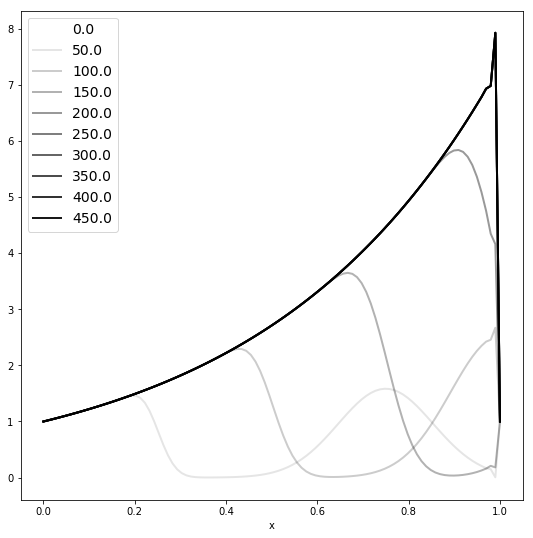

In [23]:
def plot_10_percent(x,f):
    lw = 2
    
    stepsize = np.floor(f.shape[0]/10)
    plt.figure(figsize = (9,9))
    # plt.plot(x,f[0],'k--',alpha = 1, lw = lw+.5,label = 0)
    for step in np.arange(0,f.shape[0],stepsize):
#     plt.plot(x,f[100],'k',alpha = .2, lw = lw+.5,label = 100)
#     plt.plot(x,f[200],'k',alpha = .3, lw = lw,label = 200)
#     plt.plot(x,f[300],'k',alpha = .4, lw = lw,label = 300)
#     plt.plot(x,f[400],'k',alpha = .5, lw = lw,label = 400)
#     plt.plot(x,f[500],'k',alpha = .6, lw = lw,label = 500)
#     plt.plot(x,f[600],'k',alpha = .7, lw = lw,label = 600)
#     plt.plot(x,f[700],'k',alpha = .8, lw = lw,label = 700)
#     plt.plot(x,f[800],'k',alpha = .9, lw = lw,label = 800)
#     plt.plot(x,f[3000],'k',alpha = .9, lw = lw+3,label = 3000)
        plt.plot(x,f[step],'k',alpha = step/f.shape[0], lw = lw, label = step)

#     plt.ylim([0,1])
    plt.xlabel('x')
    plt.legend(fontsize = 14)
    plt.show()
plot_10_percent(x,f)

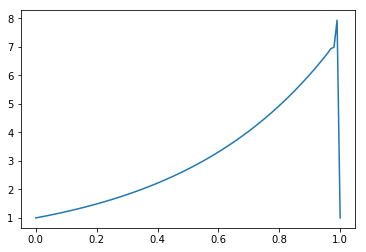

In [22]:
plt.plot(x,f[450])